# TERM experiment example with Adult dataset

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from collections import namedtuple
from sklearn.preprocessing import StandardScaler

from datasets import *
from TERM import Logistic_Regression
from fairness_metrics import fairness_scores

In [42]:
# Load adult data set
train, test = adult()
train_data = train[0]
train_labels = train[1]
test_data = test[0]
test_labels = test[1]

g = 9

Full Adult dataset loaded


In [43]:
# requires the labels to be [1,0] instead of [1,-1]
def one_to_zero(test_labels):
    for idx, x in enumerate(test_labels):
        if x == -1:
            test_labels[idx] = 0
    return test_labels

test_labels = one_to_zero(test_labels)
train_labels = one_to_zero(train_labels)

In [44]:
# scaling data required to avoid overflow
scaler = StandardScaler()
scaler.fit(train_data)
train_data = scaler.transform(train_data)

scaler = StandardScaler()
scaler.fit(test_data)
test_data = scaler.transform(test_data)

In [47]:
ts = []
eo = []
eodds = []
dp = []
te = []
err = []

for t in np.arange(-6, 6):
    
    ts.append(t)
    
    # train
    model = Logistic_Regression(tilt=t, lr=1.0, iterations=10000)
    model.fit(train_data, train_labels)
    
    # get predictions
    preds_te = model.predict(test_data)
    preds_tr = model.predict(train_data)
    
    # get error
    acc = (preds_te == test_labels).mean()
    er = 1 - acc
    err.append(er)
    
    # get fairness scores
    tr_s = fairness_scores(train_data, train_labels, preds_tr, g, n=0.0)
    train_scores = tr_s.get_scores2()
    te_s = fairness_scores(test_data, test_labels, preds_te, g, n=0.0)
    test_scores = te_s.get_scores2()
    
    eo.append(test_scores[0])
    eodds.append(test_scores[1])
    dp.append(test_scores[2])
    te.append(test_scores[3])

    print("t= {}, acc= {}, fair scores= {}".format(np.round(t,2), 
                                                   np.round(acc,2),
                                                   np.round(test_scores, 2)))
    
t = np.array(ts)
eo = np.array(eo)
eodds = np.array(eodds)
dp = np.array(dp)
te = np.array(te)
err = np.array(err)

t= -6, acc= 0.65, fair scores= [0.76 0.32 0.54 0.04]
t= -5, acc= 0.67, fair scores= [0.62 0.18 0.49 0.03]
t= -4, acc= 0.68, fair scores= [0.59 0.16 0.48 0.04]
t= -3, acc= 0.79, fair scores= [0.24 0.04 0.23 0.36]
t= -2, acc= 0.81, fair scores= [0.3  0.   0.22 0.33]
t= -1, acc= 0.82, fair scores= [0.31 0.02 0.21 0.31]


/Users/sakina/Documents/UCL/project/TERM.py:35: RuntimeWarning: divide by zero encountered in long_scalars
  tmp = (1/self.t) * np.log(np.mean(np.exp(self.t * loss)))
/Users/sakina/Documents/UCL/project/TERM.py:35: RuntimeWarning: invalid value encountered in double_scalars
  tmp = (1/self.t) * np.log(np.mean(np.exp(self.t * loss)))


t= 0, acc= 0.8, fair scores= [0.29 0.01 0.21 0.25]
t= 1, acc= 0.73, fair scores= [0.34 0.04 0.37 0.25]
t= 2, acc= 0.72, fair scores= [0.35 0.04 0.38 0.19]
t= 3, acc= 0.72, fair scores= [0.36 0.05 0.39 0.19]
t= 4, acc= 0.58, fair scores= [0.03 0.18 0.12 0.24]
t= 5, acc= 0.41, fair scores= [0.2  0.26 0.11 0.07]


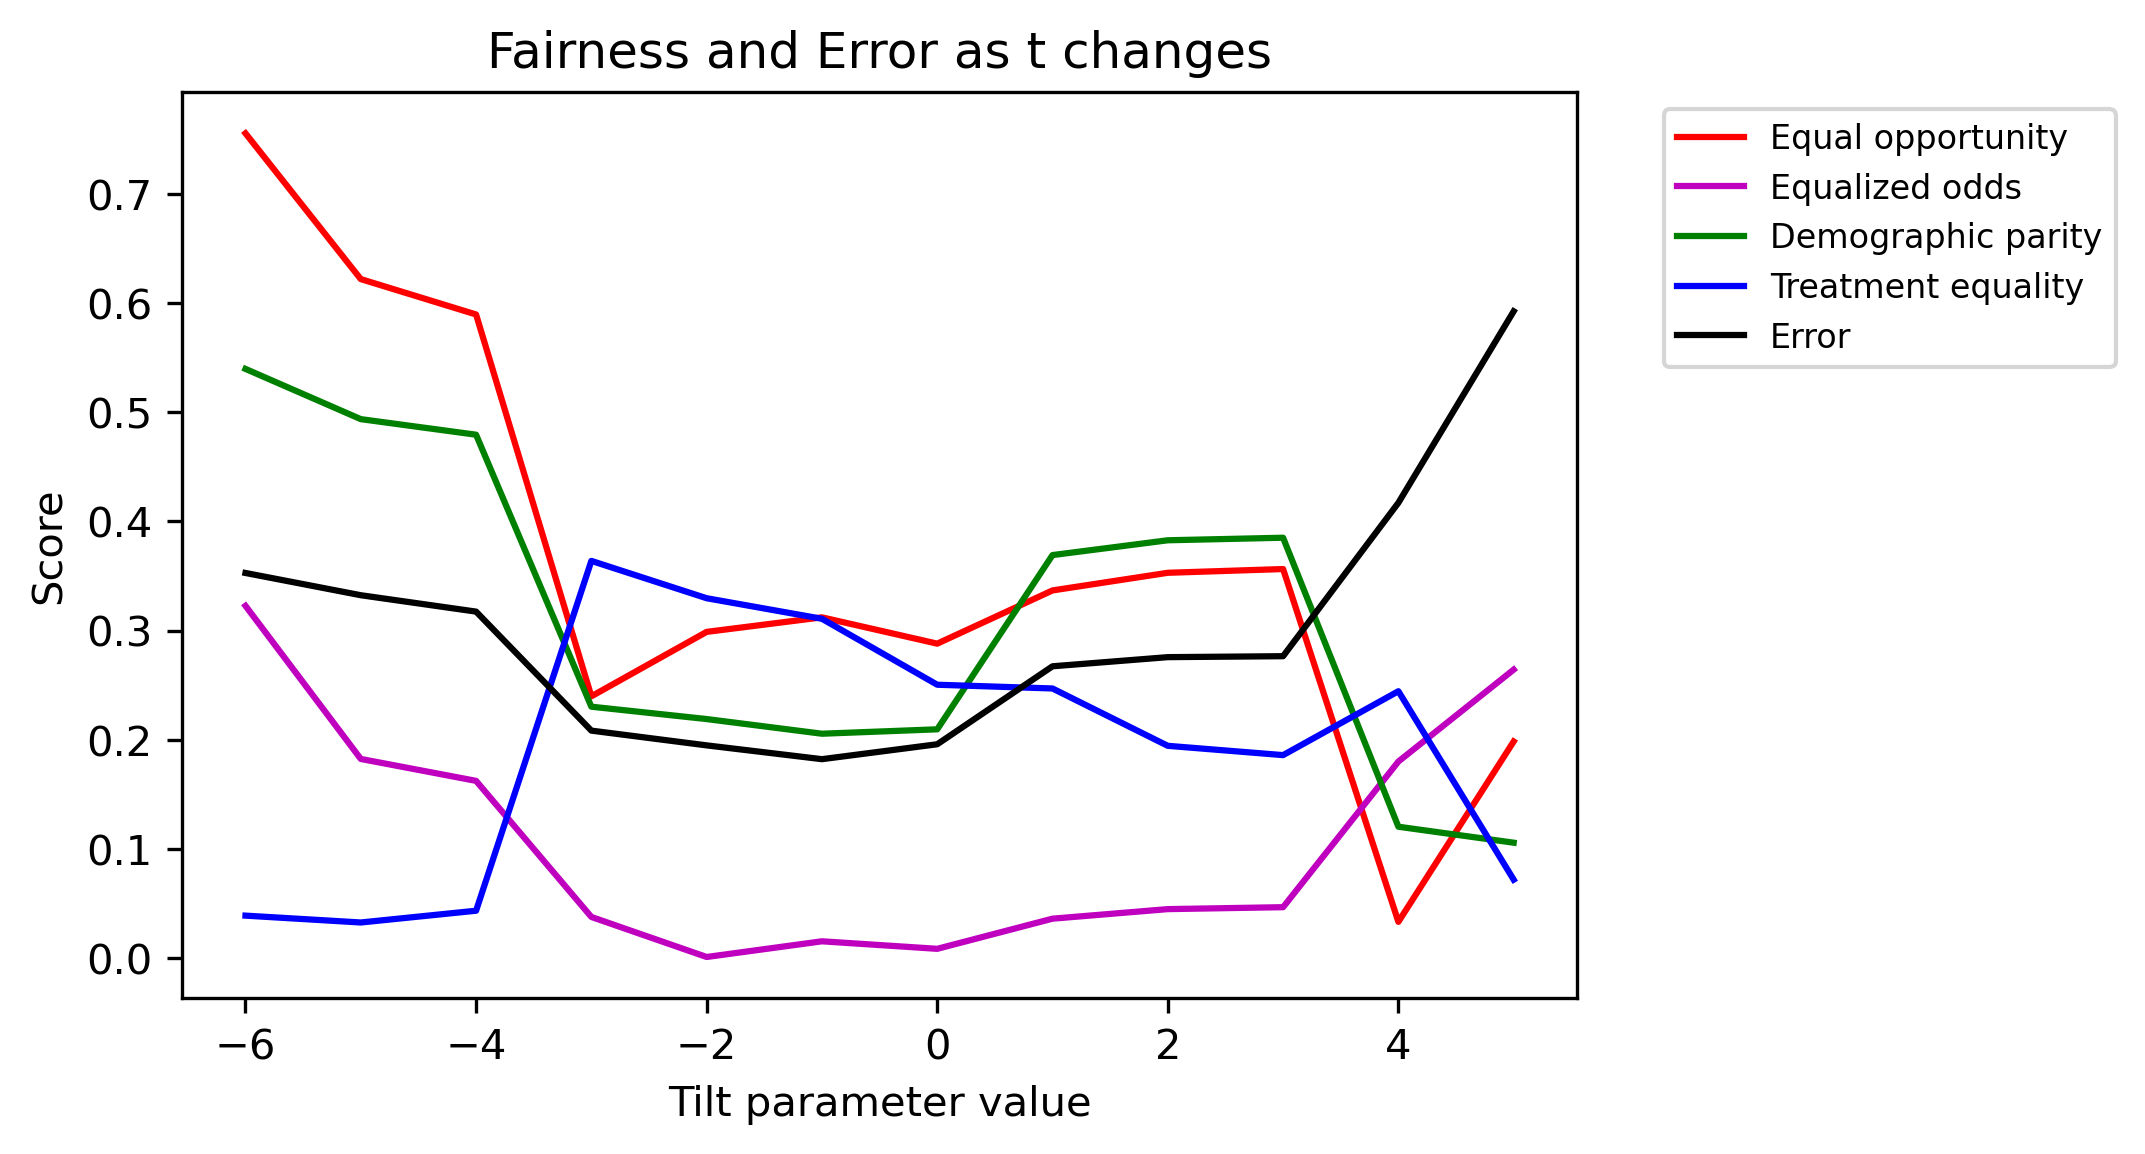

In [48]:
# PLOT of t against scores

plt.rcParams['figure.dpi'] = 300
plt.plot(t, eo, 'r-', label='Equal opportunity')
plt.plot(t, eodds,'m-', label='Equalized odds')
plt.plot(t, dp, 'g-', label='Demographic parity')
plt.plot(t, te, 'b-', label='Treatment equality')
plt.plot(t, err, 'k-', label='Error')
plt.xlabel('Tilt parameter value')
plt.ylabel('Score')
plt.title('Fairness and Error as t changes')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',fontsize=8)
plt.show()